<a href="https://colab.research.google.com/github/exception-s/AppliedAILabs/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Бражкин Александр Сергеевич, ИСУ 408321

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [2]:
def read_data(path, filename):
    # return pd.read_csv(filename)
    return pd.read_csv(os.path.join(path, filename))


df = read_data('data/notebook_files', 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [3]:
def load_dataset(label_dict):
    train_X = read_data('data/notebook_files', 'train.csv').values[:,:-2]
    train_y = read_data('data/notebook_files', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('data/notebook_files', 'test.csv').values[:,:-2]
    test_y = read_data('data/notebook_files', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)


label_dict = {
    'WALKING' : 0,
    'WALKING_UPSTAIRS' : 1,
    'WALKING_DOWNSTAIRS' : 2,
    'SITTING' : 3,
    'STANDING' : 4,
    'LAYING' : 5
}

train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_rf = RandomForestClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

Опишите вашу мотивацию по выбору модели. Какие гиперпараметры есть у выбранной вами модели? За что они отвечают? На что влияют?

## Модель **Random Forest**:
### Мотивация:

* Высокая точность на задачах классификации
* Устойчивость к переобучению(бэггинг)  
* Устойчивость к зашумленным данным и хорошая работа с категориальными данными.
* Эффективная обработка большого количества данных

### Гиперпараметры:

* n_estimators (количество деревьев, влияет на производительность)
* max_depth (максимальная глубина, влияет на обучение, предотвращение переобучения)
* min_samples_split (минимальное количество сэмплов для разделения. влияет на сложность деревьев и предотвращение переобучения)
* min_samples_leaf (минимальное количество сэмплов в листе деервьев)
* max_features (количество фичей для рассмотрения при разделении, влияет на разнообразие деревьев)


## Модель **Gradient Boosting**:
### Мотивация:

* Одна из самых мощных алгоритмических техник для задач классификации(не-нейросетевых)
* Последовательное улучшение предсказаний
* Эффективность на разнообразных типах данных
* Высокая предсказательная способность

### Гиперпараметры:

* n_estimators (количество деревьев бустинга, влияет на качество обучения, но существует риск переоубчения, если деревьев слишком много)
* learning_rate (скорость обучения, влияет на скорость обучения посредством определения "вклада" каждого дерева на результат)
* max_depth (максимальная глубина базовых деревьев, влияет на сложность модели)
* subsample (доля samples для обучения каждого дерева, влияет на предотвращение переобучения)
* min_samples_split и min_samples_leaf аналогичные Random Forest


## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [5]:
model_rf.fit(train_X, train_y)
model_gb.fit(train_X, train_y)

GradientBoostingClassifier(random_state=42)

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [6]:
yhat_rf = model_rf.predict(test_X)
yhat_gb = model_gb.predict(test_X)
yhat_gb

array([4, 4, 4, ..., 1, 1, 1])

In [7]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print("Random Forest Classification Report\n")
print(classification_report(test_y, yhat_rf, target_names=target_names))
print('-------------------------------------------------------------')
print("Gradient Boosting Classification Report\n")
print(classification_report(test_y, yhat_gb, target_names=target_names))

Random Forest Classification Report

                    precision    recall  f1-score   support

           Walking       0.89      0.97      0.93       496
  Walking Upstairs       0.88      0.89      0.89       471
Walking Downstairs       0.97      0.86      0.91       420
           Sitting       0.91      0.90      0.90       491
          Standing       0.91      0.92      0.91       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947

-------------------------------------------------------------
Gradient Boosting Classification Report

                    precision    recall  f1-score   support

           Walking       0.93      0.98      0.95       496
  Walking Upstairs       0.92      0.92      0.92       471
Walking Downstairs       0.97      0.92      0.94       420
           Sitti

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

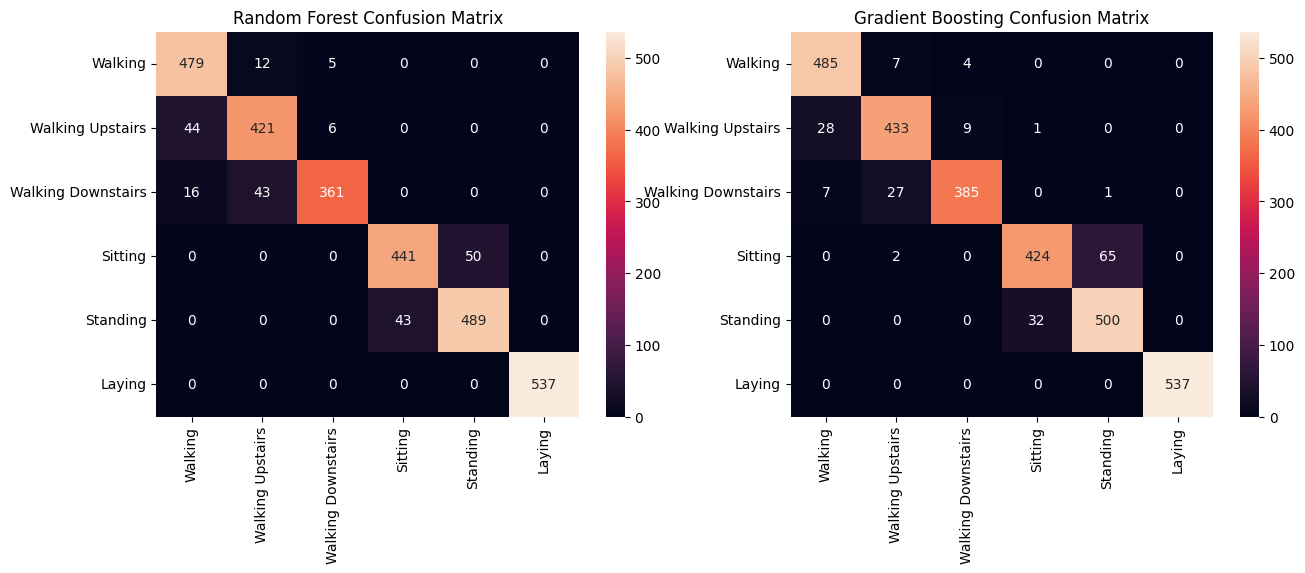

In [9]:
#Результаты сравнения

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
cm_rf = confusion_matrix(test_y, yhat_rf)
cm_gb = confusion_matrix(test_y, yhat_gb)

sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')

sns.heatmap(cm_gb, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title('Gradient Boosting Confusion Matrix')
plt.show()




## Задание


Выведите отчет о классификации, сравнив предсказания (`yhat`) с базовой истиной (`test_y`).

В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?

Используйте вариации нескольких моделей с разными гиперпараметрами. Сравните полученный результат (визуализируйте полученный результат).

Что такое гиперпараметры модели машинного обучения (МО)?

Опишите влияние гиперпараметров в выбранных вами моделях МО.

## Precision vs recall

**Precision** показывает какая доля предсказанных положительных случаев действительно является положительными.

**Recall** показывает какая доля реально положительных случаев была верно идентифицирована.

То есть если:
1. *TP* - это True Positive (Истинно положительные)

2. *FP* - False Positive (Ложно положительные)

3. *FN* - False Negative (Ложно отрицательные)

4. *TN* - True Negative (Истинно отрицательные)

То:
$$\text{Precision} = \frac{TP}{TP + FP}$$
\
$$\text{Recall} = \frac{TP}{TP + FN}$$

## Показатель F1
F1-score является гармоническим средним между Precision и Recall. Он уравновешивает обе метрики и полезен при несбалансированных классах.

Формула:
$$\text{F1} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

## Гиперпараметры модели МО

Гиперпараметры — это параметры, которые не обучаются на данных, а задаются до начала обучения. Они управляют процессом обучения и структурой модели.

Влияение описано после выбора моделей выше.

# Вариации моделей с разными гиперпараметрами

In [10]:
model_rf2 = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

model_gb2 = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

In [11]:
model_rf2.fit(train_X, train_y)
model_gb2.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=50,
                           random_state=42)

In [12]:
yhat_rf2 = model_rf2.predict(test_X)
yhat_gb2 = model_gb2.predict(test_X)

In [13]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print("Random Forest Classification Report\n")
print(classification_report(test_y, yhat_rf2, target_names=target_names))
print('-------------------------------------------------------------')
print("Gradient Boosting Classification Report\n")
print(classification_report(test_y, yhat_gb2, target_names=target_names))

Random Forest Classification Report

                    precision    recall  f1-score   support

           Walking       0.91      0.97      0.94       496
  Walking Upstairs       0.89      0.93      0.91       471
Walking Downstairs       0.96      0.84      0.90       420
           Sitting       0.98      0.88      0.92       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.94      0.94      2947

-------------------------------------------------------------
Gradient Boosting Classification Report

                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.92      0.94      0.93       471
Walking Downstairs       0.97      0.90      0.93       420
           Sitti

In [26]:
cm_rf2 = confusion_matrix(test_y, yhat_rf2)
cm_gb2 = confusion_matrix(test_y, yhat_gb2)

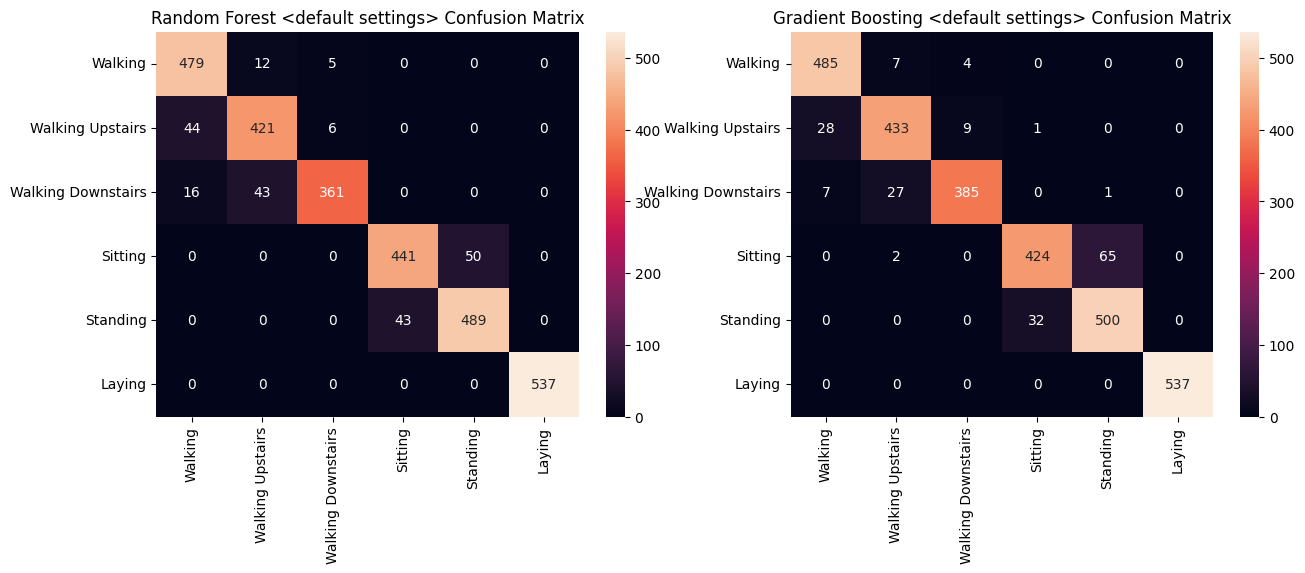

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title('Random Forest <default settings> Confusion Matrix')

sns.heatmap(cm_gb, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title('Gradient Boosting <default settings> Confusion Matrix')
plt.show()

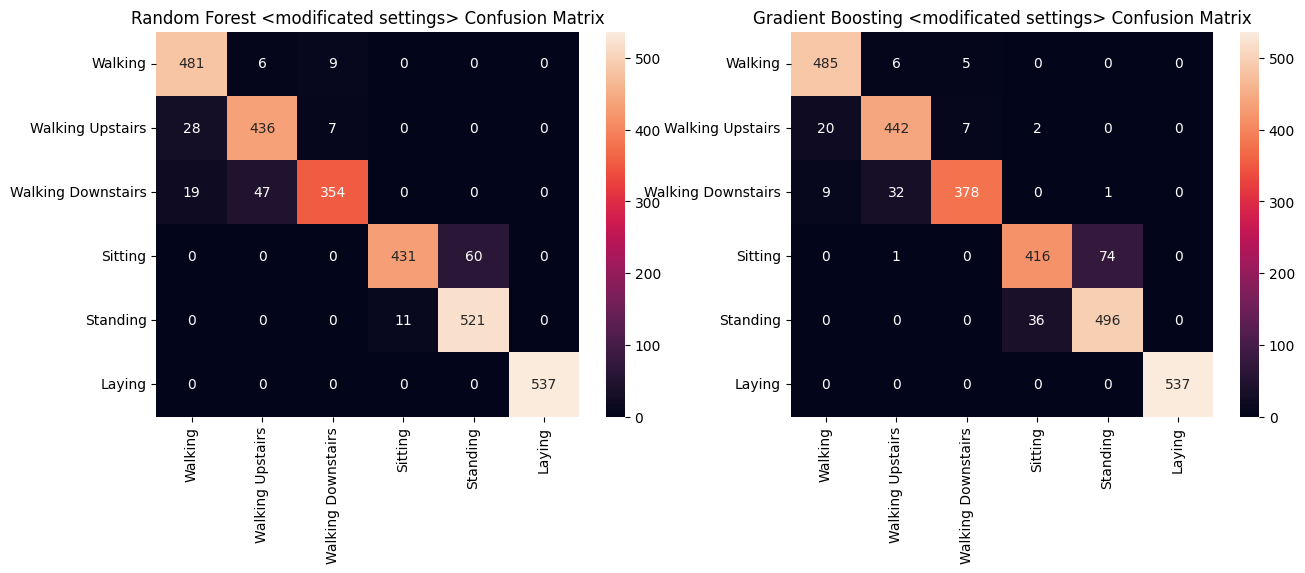

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_rf2, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title('Random Forest <modificated settings> Confusion Matrix')

sns.heatmap(cm_gb2, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title('Gradient Boosting <modificated settings> Confusion Matrix')
plt.show()